## Prepare
import and set variable

In [1]:
from corpus import *
from vsm import *

c.words

# train the model and create a TfViewer object
tf = TF(c, context_type)
tf.train()
tf_v = TfViewer(c, tf)

# print the most frequent terms in the document
# remember that IPython automatically prints the last cell of a document
tf_v.coll_freqs()


# replace 'topic_range[0]' with a specific number, if you like
k = topic_range[0]

# load the topic model
v = lda_v[k]

#v.topics()

#v.doc_topics(v.labels[:3])

v.aggregate_doc_topics(v.labels[:], normed_sum=True)

#v.dist(v.labels[0], v.labels[1])
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import randn
import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='/home/hongliang/Downloads/msyh.ttf/msyh.ttf')
import sys
reload(sys)
kongzi = []
mengzi = []
xunzi =[]

count = 0
for label in v.labels[:]:
    if '孟子'.decode('utf-8') in label:
        mengzi.append(count)
    elif '论语'.decode('utf-8') in label:
        kongzi.append(count)
    elif '荀子'.decode('utf-8') in label:
        xunzi.append(count)
    count += 1



Running from notebook, using serial load function.
[20, 40, 60, 80, 100]
/home/hongliang/Downloads/mirrorfunctions/models/mirrorfunctions-freq5-freq2-N324234-LDA-K{0}-document-1000.npz
Loading LDA data from /home/hongliang/Downloads/mirrorfunctions/models/mirrorfunctions-freq5-freq2-N324234-LDA-K20-document-1000.npz


In [6]:
i= '我'
i
print i

## functions:

In [2]:
# get term frequency in a particular corpus

def term_freq_labels(term,labels):
    count = 0
    for i in labels: 
        index = c.meta_int('document', {'document_label' : v.labels[i]})
        document = c.view_contexts('document', as_strings=True)[index]
        count += (document == term.decode('utf-8')).sum()
    return count
#get the whole occurrances in a corpus

def allfreq(labels):
    countall = 0    
    for i in labels:
        #wenzi = []
        num = []
        index = c.meta_int('document', {'document_label' : v.labels[i]})
        document = c.view_contexts('document', as_strings=True)[index]
        for a in set(document):
            count = 0
            count += (document == a.decode('utf-8')).sum()
            num.append(count)
            #wenzi.append([a,count])
        countall += sum(num)
    
    return countall



## Get list for topics and topics_weight

In [3]:
#1.找到前十的topic的编号
top10topics = []
top10topicsweight = []
for a in v.aggregate_doc_topics(v.labels[:], normed_sum=True):
    top10topics.append(a[0])
    top10topicsweight.append(a[1])
print top10topics[:10]

#2.生成每个topic的值
wordf = []
wordw = []
word=[]
for a in top10topics[:10]:
    for b in v.topics()[a][:10]:
        wordw.append(b[1])
        word.append(b[0])
        wordf.append(tf_v.coll_freq(b[0]))
def chunks(arr, n):
    return [arr[i:i+n] for i in range(0, len(arr), n)]
#print chunks(wordw,10),chunks(word,10),chunks(wordf,10)


## Figure 2  
Keyword loading in Highest Loading Ten Topics in Our Corpus
Figure 2 y label is word-weight
Figure 2.1 y label is frequency

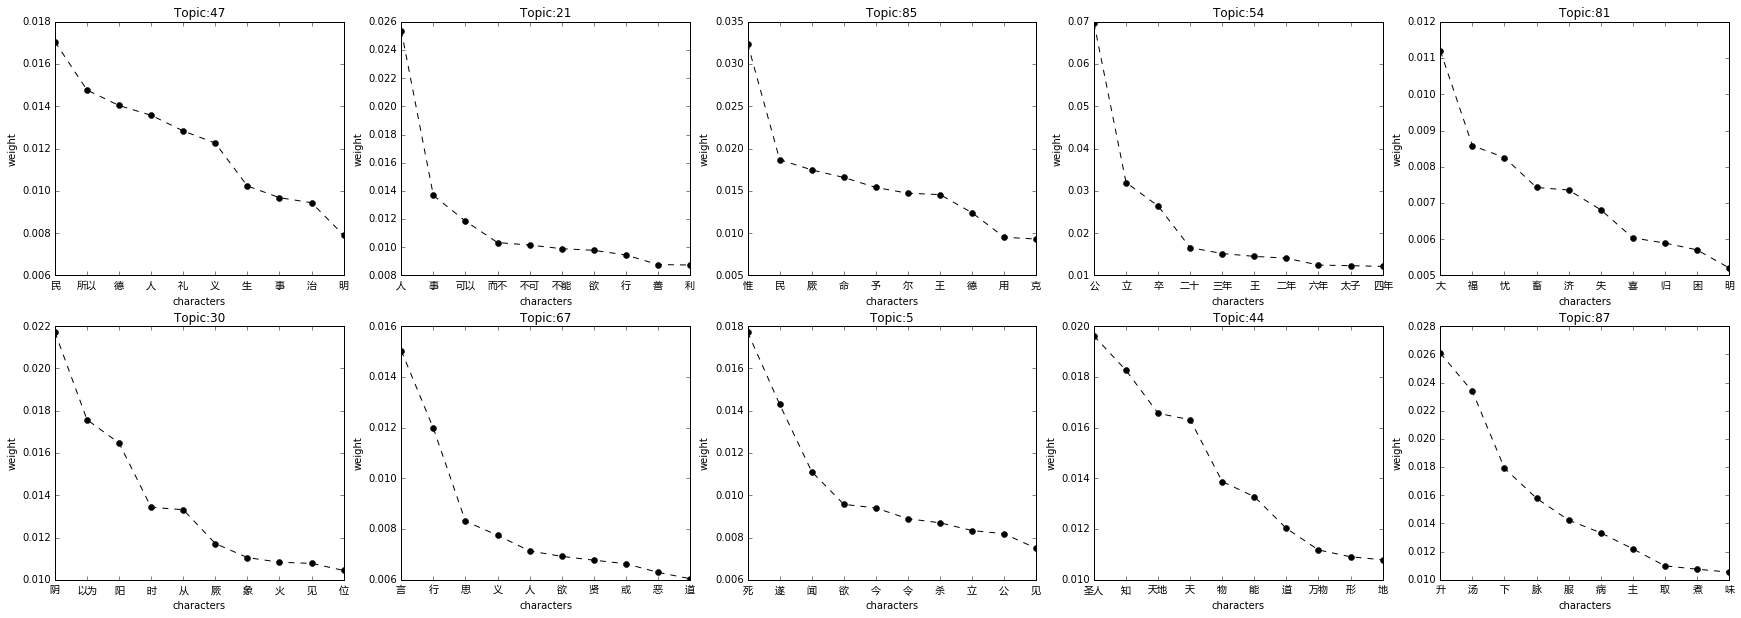

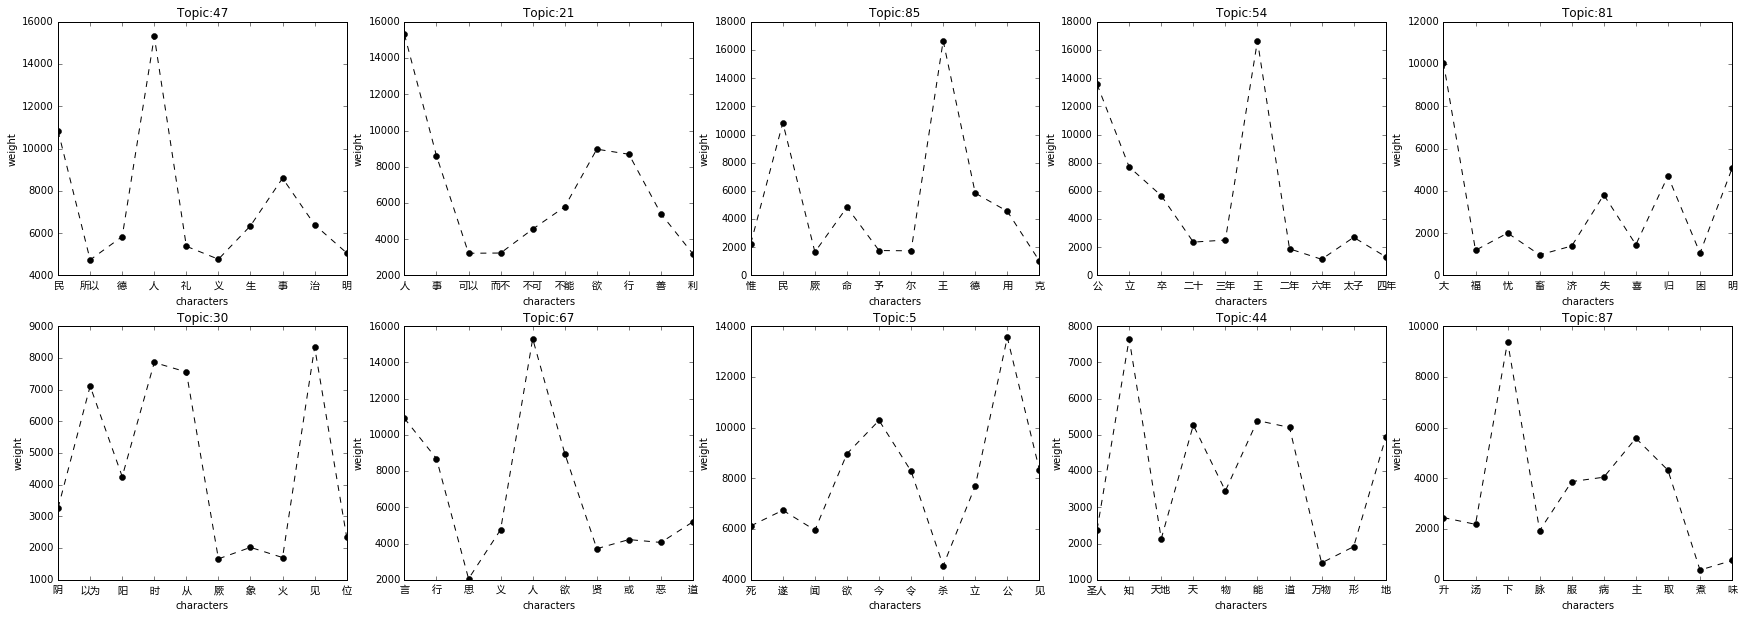

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import randn
import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='/home/hongliang/Downloads/msyh.ttf/msyh.ttf')
import sys
reload(sys)
sys.setdefaultencoding("utf-8")

fig2 = plt.figure(figsize=(30,10))
for i in range(0,10):
    ax = plt.subplot(2,5,1+i)
    plt.plot(chunks(wordw,10)[i],'ko--')
    ticks = ax.set_xticks(range(0,10))
    labels = ax.set_xticklabels(chunks(word,10)[i],fontproperties=myfont)
    ax.set_xlabel('characters')
    ax.set_ylabel('weight')
    ax.set_title('Topic:%d'%top10topics[i])
plt.savefig('Figure 2')
    
fig21 = plt.figure(figsize=(30,10))
for i in range(0,10):
    ax = plt.subplot(2,5,1+i)
    plt.plot(chunks(wordf,10)[i],'ko--')
    ticks = ax.set_xticks(range(0,10))
    labels = ax.set_xticklabels(chunks(word,10)[i],fontproperties=myfont)
    ax.set_xlabel('characters')
    ax.set_ylabel('weight')
    ax.set_title('Topic:%d'%top10topics[i])
plt.savefig('Figure 21')

## Figure 3 Highest Loading 10 Topics in Corpus
'Topics','Corpus Weight','Topic Keywords in Descending Order of Weight','Topic Name'

In [65]:
v.topics(print_len=50)[72]

LabeledColumn([(u'\u541b\u5b50', 0.03204643726348877),
       (u'\u8bd7\u66f0', 0.020847856998443604),
       (u'\u5b5d', 0.01689835824072361), ...,
       (u'\u5934\u5927', 4.999361635782407e-07),
       (u'\u5934\u4e5f', 4.999361635782407e-07),
       (u'\u0415', 4.999361635782407e-07)], 
      dtype=[('word', 'O'), ('value', '<f4')])

In [37]:
from pandas import Series,DataFrame
import pandas as pd
#data = {"Topics":top10topics[:10], "Corpus Weight":top10topicsweight[:10], "Topic Name":[,,,,,,,,,],"Topic Keywords in Descending Order of Weight":chunks(word,10)} 
keywords = []
for a in chunks(word,10):
    keywords.append('  '.join(a))
topicname =['benevolent rule 德政','ethical rulership道德规范','political affairs 政治事件','political affairs 政治事件','治国','cosmos&astrology 宇宙&占卜','ethics&politics 伦理&政治','political affairs 政治事件','nature&cosmos 自然&宇宙','traditional Chinese medicine 中医']  
data3 = {"Topics":top10topics[:10],"Corpus Weight":top10topicsweight[:10],"Topic Keywords in Descending Order of Weight":keywords,"Topic Name":topicname}
f3 = DataFrame(data3,columns=['Topics','Corpus Weight','Topic Keywords in Descending Order of Weight','Topic Name'])
f3

,Topics,Corpus Weight,Topic Keywords in Descending Order of Weight,Topic Name
0,47,0.036326,民 所以 德 人 礼 义 生 事 治 明,benevolent rule 德政
1,21,0.032177,人 事 可以 而不 不可 不能 欲 行 善 利,ethical rulership道德规范
2,85,0.030732,惟 民 厥 命 予 尔 王 德 用 克,political affairs 政治事件
3,54,0.030500,公 立 卒 二十 三年 王 二年 六年 太子 四年,political affairs 政治事件
4,81,0.026413,大 福 忧 畜 济 失 喜 归 困 明,治国
5,30,0.024773,阴 以为 阳 时 从 厥 象 火 见 位,cosmos&astrology 宇宙&占卜
6,67,0.024178,言 行 思 义 人 欲 贤 或 恶 道,ethics&politics 伦理&政治
7,5,0.021362,死 遂 闻 欲 今 令 杀 立 公 见,political affairs 政治事件
8,44,0.020758,圣人 知 天地 天 物 能 道 万物 形 地,nature&cosmos 自然&宇宙
9,87,0.020716,升 汤 下 脉 服 病 主 取 煮 味,traditional Chinese medicine 中医


##  Figure 4 Corpus weights Topics 0-99



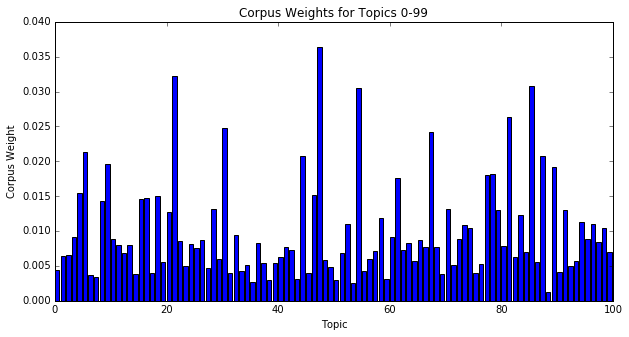

In [6]:
#图四，topic weight 分布

fig4 = plt.figure(figsize=(10,5))
#plt.plot(chunks(wordf,10)[i],'ko--')
plt.bar(top10topics, top10topicsweight)
#plt.ylim(0, max(mean_values) * 1.1)
#ticks = ax.set_xticks(range(0,10))
#labels = ax.set_xticklabels(chunks(word,10)[i],fontproperties=myfont)

plt.xlabel('Topic')  
plt.ylabel('Corpus Weight')  
plt.title('Corpus Weights for Topics 0-99')  
plt.savefig('figure4')

## Figure 5 

They are using topic 34. I just copy the term in their topic

need to find our topic again

In [7]:
term = ['君','人','义','礼','能','贤','莫','天','恶','安']
English = ['nobleman','person','rigteousness','ritual','able','virtuous','do not','day/heaven','evil','peace']

occurrencex = []
occurrencem = []
occurrencek = []

for a in term:
    occurrencek.append(term_freq_labels(a,kongzi))
    occurrencem.append(term_freq_labels(a,mengzi))
    occurrencex.append(term_freq_labels(a,xunzi)) 


    
    
    
k = allfreq(kongzi)
m = allfreq(mengzi)
x = allfreq(xunzi)
k_per_1000 = []
m_per_1000 = []
x_per_1000 = []

for a in occurrencek:
    k_per_1000.append(a*1000/float(k))
for a in occurrencek:
    m_per_1000.append(a*1000/float(m))
for a in occurrencek:
    x_per_1000.append(a*1000/float(x))

Results shows that our numbers are different ， need checked

To do：
Term rank


In [8]:
data5 = {"Mengzi per 1000 characters":m_per_1000,"Xunzi per 1000 characters":x_per_1000,"Kongzi per 1000 characters":k_per_1000,"Term":term,"English":English,"Occurrences in Kongzi":occurrencek,"Occurrences in Mengzi":occurrencem,"Occurrences in Xunzi":occurrencex}
f5 = DataFrame(data5,columns=['Term','English','Occurrences in Kongzi','Kongzi per 1000 characters','Occurrences in Mengzi','Mengzi per 1000 characters','Occurrences in Xunzi','Xunzi per 1000 characters'])
f5

,Term,English,Occurrences in Kongzi,Kongzi per 1000 characters,Occurrences in Mengzi,Mengzi per 1000 characters,Occurrences in Xunzi,Xunzi per 1000 characters
0,君,nobleman,33,4.387131,117,1.776008,166,0.839631
1,人,person,53,7.045998,166,2.852376,397,1.348498
2,义,rigteousness,15,1.994150,58,0.807276,229,0.381650
3,礼,ritual,40,5.317735,46,2.152737,250,1.017734
4,能,able,20,2.658867,42,1.076368,159,0.508867
5,贤,virtuous,12,1.595320,47,0.645821,74,0.305320
6,莫,do not,16,2.127094,37,0.861095,147,0.407094
7,天,day/heaven,9,1.196490,44,0.484366,78,0.228990
8,恶,evil,32,4.254188,74,1.722189,144,0.814187
9,安,peace,11,1.462377,16,0.592003,118,0.279877


## Figure 6   Topic 27 Keywords & Weight
Topic 27 没有相同内容的topic（白马非法论和坚白论）

In [42]:
Chinese = []
Pinyin = ['tian','yu','shi','jian','gui','long','xiong','bing','ji','ren']
English = ['heaven','rain','time','see','turtle','dragon','ominous','illness','propitious','people']
WordWeight = []
for a in v.topics()[27][:10]:
    Chinese.append(a[0])
    WordWeight.append(a[1])

data6 = {"Chinese":Chinese,"pinyin":Pinyin,"English":English,"word weight":WordWeight}
f6 = DataFrame(data6,columns=['Chinese','pinyin','English','word weight'])
f6

,Chinese,pinyin,English,word weight
0,天,tian,heaven,0.019434
1,雨,yu,rain,0.012195
2,时,shi,time,0.010307
3,见,jian,see,0.009678
4,龟,gui,turtle,0.008576
5,龙,long,dragon,0.008301
6,凶,xiong,ominous,0.008262
7,病,bing,illness,0.008222
8,吉,ji,propitious,0.008144
9,人,ren,people,0.008104


## Figure 7 Weightiest 10 topics in each of Analects,Mencius&Xunzi


In [10]:

la = kongzi

topick=[]

keywordsk = []
keywordk=[]
topicweightk=[]

for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True)[:10]:
    topick.append(a[0])
    topicweightk.append(a[1])
    
for a in topick:
    for b in v.topics()[a][:10]:
        keywordsk.append(b[0])

        
for a in chunks(keywordsk,10):
    keywordk.append('  '.join(a))

    


In [11]:
data71 = {"Topic":topick,"Keywords":keywordk,"Text Weight in Kongzi":topicweightk}
f71 = DataFrame(data71,columns=['Topic','Keywords','Text Weight in Kongzi'])
f71

,Topic,Keywords,Text Weight in Kongzi
0,77,子曰 孔子 孔 问 君子 言 子贡 闻 夫子 鲁,0.490993
1,98,大夫 君 礼 士 食 见 命 毋 言 齐,0.080685
2,21,人 事 可以 而不 不可 不能 欲 行 善 利,0.075853
3,67,言 行 思 义 人 欲 贤 或 恶 道,0.064721
4,72,君子 诗曰 孝 者也 之以 亲 学 善 敬 而不,0.045459
5,47,民 所以 德 人 礼 义 生 事 治 明,0.019255
6,74,君 齐 季 人 楚 王 陈 昭 杀 遂,0.018476
7,66,叔 公 大 伯 弗 从 诸侯 晋 对曰 孙,0.016418
8,28,传 书 周 汉 春秋 文 事 世 诗 着,0.014683
9,61,国 兵 天下 民 行 亡 胜 伐 诸侯 地,0.010598


In [12]:
la = mengzi

topicm=[]

keywordsm = []
keywordm=[]
topicweightm=[]

for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True)[:10]:
    topicm.append(a[0])
    topicweightm.append(a[1])
    
for a in topicm:
    for b in v.topics()[a][:10]:
        keywordsm.append(b[0])

        
for a in chunks(keywordsm,10):
    keywordm.append('  '.join(a))

    

data72 = {"Topic":topicm,"Keywords":keywordm,"Text Weight in Mengzi":topicweightm}
f72 = DataFrame(data72,columns=['Topic','Keywords','Text Weight in Mengzi'])
f72

,Topic,Keywords,Text Weight in Mengzi
0,54,公 立 卒 二十 三年 王 二年 六年 太子 四年,0.082740
1,47,民 所以 德 人 礼 义 生 事 治 明,0.044877
2,67,言 行 思 义 人 欲 贤 或 恶 道,0.038032
3,77,子曰 孔子 孔 问 君子 言 子贡 闻 夫子 鲁,0.034705
4,21,人 事 可以 而不 不可 不能 欲 行 善 利,0.026827
5,15,师 郑 公 伐 人 卫 侯 齐 晋 春,0.025495
6,83,帝 舜 禹 尧 姓 天下 命 夏 汤 黄帝,0.022471
7,63,举 拜 迁 令 征 太守 尚书 见 闻 字,0.021728
8,68,帝 等 元年 中 时 梁 太后 延 窦 三年,0.020793
9,79,祭 礼 诸侯 天子 祀 庙 大 郊 尊 王,0.020620


In [13]:
la = xunzi

topicx=[]

keywordsx = []
keywordx=[]
topicweightx=[]

for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True)[:10]:
    topicx.append(a[0])
    topicweightx.append(a[1])
    
for a in topicx:
    for b in v.topics()[a][:10]:
        keywordsx.append(b[0])

        
for a in chunks(keywordsx,10):
    keywordx.append('  '.join(a))

    
    
data73 = {"Topic":topicx,"Keywords":keywordx,"Text Weight in Xunzi":topicweightx}
f73 = DataFrame(data73,columns=['Topic','Keywords','Text Weight in Xunzi'])
f73

,Topic,Keywords,Text Weight in Xunzi
0,97,天下 义 礼 之谓 君子 下 然而 足以 者也 莫,0.223406
1,47,民 所以 德 人 礼 义 生 事 治 明,0.125977
2,21,人 事 可以 而不 不可 不能 欲 行 善 利,0.082343
3,72,君子 诗曰 孝 者也 之以 亲 学 善 敬 而不,0.079771
4,16,知 贤 得 相 人 圣 今 治 不能 恶,0.064189
5,77,子曰 孔子 孔 问 君子 言 子贡 闻 夫子 鲁,0.049459
6,67,言 行 思 义 人 欲 贤 或 恶 道,0.048290
7,44,圣人 知 天地 天 物 能 道 万物 形 地,0.043314
8,61,国 兵 天下 民 行 亡 胜 伐 诸侯 地,0.025884
9,89,民 主 国 法 君 治 臣 赏 令 上,0.024999


##
Per 1000 Characters = (tf_v.coll_freq(Term[i])  /  sum(text[]))

## Figure 8 Topics Differentiating Analects, Mencius and Xunzi from one another

In [14]:
kmx=[]
km=[]
kx=[]
dk=[]
mx=[]
dm=[]
dx=[]
for a in range(0,100):
    if a in topick:
        if a in topicm:
            if a in topicx:
                kmx.append(a)
            else:
                km.append(a)
        else:
            if a in topicx:
                kx.append(a)
            else:
                dk.append(a)
    else:
        if a in topicm:
            if a in topicx:
                mx.append(a)
            else:
                dm.append(a)
        else:
            if a in topicx:
                dx.append(a)
print kmx,km,kx,dk,mx,dm,dx
                
        

In [62]:
Document=[]
TextWeight=[]
TOPIC1=[]
corpusweight =[]
name =['history 历史','politician 政治人物','political affairs 政治事件','law and discipline rite 礼法','politics&war 政治&战争','political affairs 政治事件','public office 官职','political affairs&history 政治事件&历史','sacrifice 祭祀','politics&history 政治&历史','individual morality 个人道德','nature&cosmos 自然&宇宙','government 国家治理','government&ethics 政府&伦理']  
keywords=[]

for a in dk:
    
    i = topick.index(a)
    j = top10topics.index(a)
    Document.append('Analects')
    TextWeight.append(topicweightk[i])
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])
    keywords.append(keywordk[i])
for a in dm:
    
    i = topicm.index(a)
    j = top10topics.index(a)
    Document.append('Mengzi')
    TextWeight.append(topicweightm[i])
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])
    keywords.append(keywordm[i])
for a in dx:
    
    i = topicx.index(a)
    j = top10topics.index(a)
    Document.append('Xunzi')
    TextWeight.append(topicweightx[i])
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])
    keywords.append(keywordx[i])


data8 = {"Document":Document,"Text Weight":TextWeight,"Topic":TOPIC1,"Corpus Weight":corpusweight,"Name":name,"keywords":keywords}
f8 = DataFrame(data8,columns=['Document','Text Weight','Topic','Corpus Weight','Name','keywords'])
f8

,Document,Text Weight,Topic,Corpus Weight,Name,keywords
0,Analects,0.014683,28,0.013183,history 历史,传 书 周 汉 春秋 文 事 世 诗 着
1,Analects,0.016418,66,0.007766,politician 政治人物,叔 公 大 伯 弗 从 诸侯 晋 对曰 孙
2,Analects,0.018476,74,0.010492,political affairs 政治事件,君 齐 季 人 楚 王 陈 昭 杀 遂
3,Analects,0.080685,98,0.010424,law and discipline rite 礼法,大夫 君 礼 士 食 见 命 毋 言 齐
4,Mengzi,0.025495,15,0.014627,politics&war 政治&战争,师 郑 公 伐 人 卫 侯 齐 晋 春
5,Mengzi,0.082740,54,0.030500,political affairs 政治事件,公 立 卒 二十 三年 王 二年 六年 太子 四年
6,Mengzi,0.021728,63,0.008308,public office 官职,举 拜 迁 令 征 太守 尚书 见 闻 字
7,Mengzi,0.020793,68,0.007707,political affairs&history 政治事件&历史,帝 等 元年 中 时 梁 太后 延 窦 三年
8,Mengzi,0.020620,79,0.013052,sacrifice 祭祀,祭 礼 诸侯 天子 祀 庙 大 郊 尊 王
9,Mengzi,0.022471,83,0.012342,politics&history 政治&历史,帝 舜 禹 尧 姓 天下 命 夏 汤 黄帝


## Figure 9 Topic 5's Text Weights

In [16]:
Text=[]
TextWeight5=[]

#for a in kongzi:
#    Text.append(v.labels[i])
#    for a in 

data9 = {"Text":Text,"Text weight of topic 5":TextWeight5}
f9 = DataFrame(data73,columns=['Text','Text weight of topic 5'])
f9

,Text,Text weight of topic 5


In [17]:
v.labels[384]

u'mirrorfunctions/\u5112\u5bb6/\u8bba\u8bed/\u5377\u516d\u3000\u5148\u8fdb\u7b2c\u5341\u4e00.txt'

## Figure 10 Text Weights in A/M/X

In [18]:
la=kongzi
topick=[]
topicweightk=[]
for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True):
    topick.append(a[0])
    topicweightk.append(a[1])
la=mengzi
topicm=[]
topicweightm=[]
for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True):
    topicm.append(a[0])
    topicweightm.append(a[1])
la=xunzi
topicx=[]
topicweightx=[]
for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True):
    topicx.append(a[0])
    topicweightx.append(a[1])

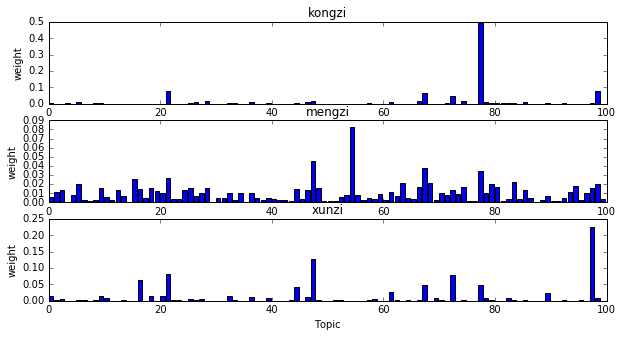

In [19]:
fig10 = plt.figure(figsize=(10,5))

ax10_1 = plt.subplot(3,1,1)
plt.bar(topick, topicweightk)
ax10_1.set_xlabel('Topic')
ax10_1.set_ylabel('weight')
ax10_1.set_title('kongzi')

ax10_2 = plt.subplot(3,1,2)
plt.bar(topicm, topicweightm)
ax10_2.set_xlabel('Topic')
ax10_2.set_ylabel('weight')
ax10_2.set_title('mengzi')

ax10_3 = plt.subplot(3,1,3)
plt.bar(topicx, topicweightx)
ax10_3.set_xlabel('Topic')
ax10_3.set_ylabel('weight')
ax10_3.set_title('xunzi')





plt.savefig('Figure 10')

##  Figure 11 Formal Interpretation Matrix of Intersections of Analects, Mencius and Xunzi with Topic Keywords (∩=intersection of sets)


In [71]:
Document=[]
TextWeight=[]
TOPIC1=[]
corpusweight =[]
name =['ethical rulership 道德规范','benevolent rule 德政','ethics&politics 伦理&政治','kindheartedness 仁','politics&war 政治&战争','filial piety 孝']
keywords=[]

for a in kmx:
    
    i1 = topick.index(a)
    i2 = topicm.index(a)
    i3 = topicx.index(a)
    j = top10topics.index(a)
    Document.append('KMX')
    TextWeight.append(str(topicweightk[i1])+'/'+str(topicweightm[i2])+'/'+str(topicweightx[i3]))
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])

    keywords.append(keywordk[i1])
for a in km:
    
    i1 = topick.index(a)
    i2 = topicm.index(a)
    j = top10topics.index(a)
    Document.append('KM')
    TextWeight.append(str(topicweightk[i1])+'/'+str(topicweightm[i2]))
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])

    keywords.append(keywordm[i2])
for a in kx:
    
    i1 = topick.index(a)
    i3 = topicx.index(a)
    j = top10topics.index(a)
    Document.append('KX')
    TextWeight.append(str(topicweightk[i1])+'/'+str(topicweightx[i3]))
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])

    keywords.append(keywordx[i3])
for a in mx:
    
    i2 = topicm.index(a)
    i3 = topicx.index(a)
    j = top10topics.index(a)
    Document.append('MX')
    TextWeight.append(str(topicweightm[i2])+'/'+str(topicweightx[i3]))
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])

    keywords.append(keywordx[i3])


data11 = {"Document":Document,"Text Weight":TextWeight,"Topic":TOPIC1,"Corpus Weight":corpusweight,"Name":name,"keywords":keywords}
f11 = DataFrame(data11,columns=['Document','Text Weight','Topic','Corpus Weight','Name','keywords'])
f11

,Document,Text Weight,Topic,Corpus Weight,Name,keywords
0,KMX,0.0758535/0.0268267/0.0823425,21,0.032177,ethical rulership 道德规范,人 事 可以 而不 不可 不能 欲 行 善 利
1,KMX,0.0192549/0.0448767/0.125977,47,0.036326,benevolent rule 德政,民 所以 德 人 礼 义 生 事 治 明
2,KMX,0.0647214/0.0380325/0.04829,67,0.024178,ethics&politics 伦理&政治,言 行 思 义 人 欲 贤 或 恶 道
3,KMX,0.490993/0.034705/0.0494594,77,0.017997,kindheartedness 仁,子曰 孔子 孔 问 君子 言 子贡 闻 夫子 鲁
4,KX,0.0105982/0.0258843,61,0.017578,politics&war 政治&战争,国 兵 天下 民 行 亡 胜 伐 诸侯 地
5,KX,0.0454589/0.0797708,72,0.008923,filial piety 孝,君子 诗曰 孝 者也 之以 亲 学 善 敬 而不


In [72]:
print kongzi